# Data loading

In [6]:
import os
import requests
from pathlib import Path

## Data that is loaded is netflix stock prices from may 2002 to today

In [7]:
NFLX_path = Path("./data/NFLX.csv")

if not os.path.exists(NFLX_path):
    req = requests.get('https://query1.finance.yahoo.com/v7/finance/download/NFLX?period1=1022198400&period2=1717686622&interval=1d&events=history&includeAdjustedClose=true', headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.3'})
    if req.status_code == 200:
        with open(NFLX_path, 'wb') as f:
            f.write(req.content)
        print('Data file loaded.')
    else:
        raise AssertionError('CSV file not downloaded.', req.status_code)

# Data exploration

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
df = pd.read_csv(NFLX_path, parse_dates=['Date'])
df = df.sort_values('Date').set_index('Date')
df = df.drop_duplicates()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


<Axes: xlabel='Date'>

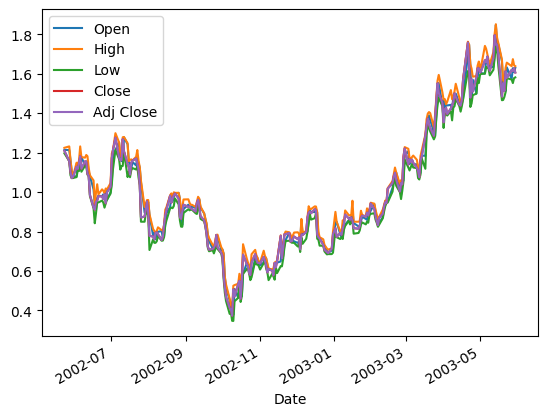

In [48]:
df['2002-05':'2003-05'].drop('Volume', axis=1).plot()

<Axes: xlabel='Date'>

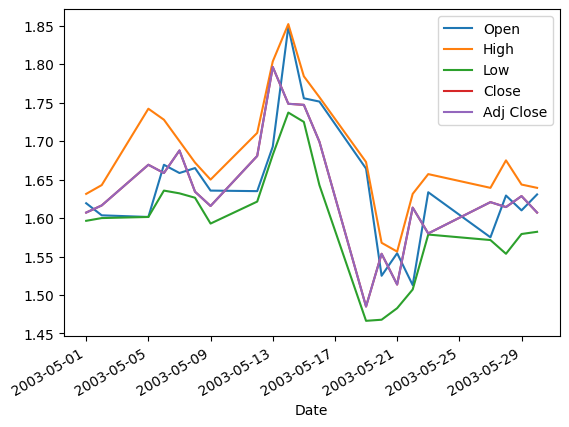

In [50]:
df['2003-05':'2003-05'].drop('Volume', axis=1).plot()

In [63]:
any_null_values =df.isnull().values.any()
any_nan_values = df.isna().values.any()

print("any_null_values:", any_null_values)
print("any_nan_values:", any_nan_values)

any_null_values: False
any_nan_values: False


<Axes: >

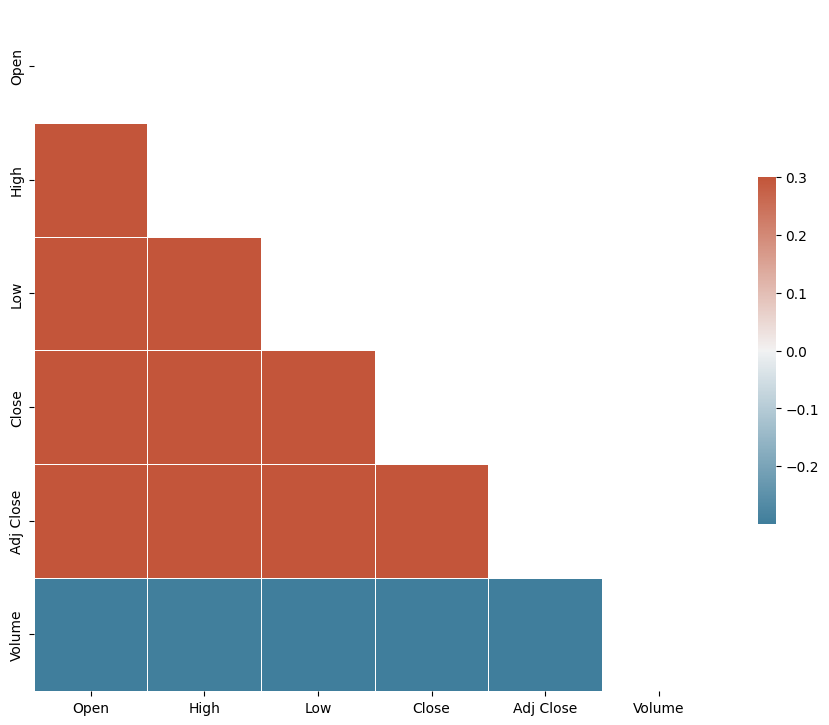

In [42]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data split and scaling

In [106]:
from datetime import date
from datetime import timedelta


start_day = df.index.min().date()
today = date.today()

days_start_today = today-start_day

train_set_size = (days_start_today * 0.75)
validation_set_size = (days_start_today * 0.05)
test_set_size = days_start_today * 0.20

train_set_start_day = start_day
train_set_end_date = start_day + train_set_size - timedelta(1)

validation_set_start_date = train_set_end_date + timedelta(1)
validation_set_end_day = validation_set_start_date + validation_set_size - timedelta(1)

test_set_start_date = validation_set_end_day + timedelta(1)
test_set_end_day = today

print('train_set_start_day:', train_set_start_day,'\t' , 'train_set_end_date:', train_set_end_date)
print('validation_set_start_date:', validation_set_start_date, '\t' , 'validation_set_end_day:', validation_set_end_day)
print('test_set_start_date:', test_set_start_date, '\t' , 'test_set_end_day:', test_set_end_day)

train_set_start_day: 2002-05-24 	 train_set_end_date: 2018-12-01
validation_set_start_date: 2018-12-02 	 validation_set_end_day: 2020-01-07
test_set_start_date: 2020-01-08 	 test_set_end_day: 2024-06-06


In [110]:
train = df[train_set_start_day:train_set_end_date]
valid = df[validation_set_start_date:validation_set_end_day]
test = df[test_set_start_date:test_set_end_day]

In [115]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
train_scaled = std.fit_transform(train)
valid_scaled = std.transform(valid)
test_scaled = std.transform(test)

In [114]:
import tensorflow as tf


AttributeError: 'numpy.ndarray' object has no attribute 'describe'